In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import re
os.chdir("./Desktop/ArticleClassifier")

# Changing the kernels being used and the c values

# Preprocessing the Data

In [2]:
# Run through 70% of the text files from each category (folder)
# 70% Training, 30% Testing for each category
#Creates training_titles and testing_tiles
training_titles_files = []
testing_titles_files = [] 

business_files = os.listdir("./business")
train_business = business_files[0:358]
test_business = business_files[358:] # length = 152, TOTAL = 510 
training_titles_files.append(train_business)
testing_titles_files.append(test_business)

entertainment_files = os.listdir("./entertainment")
train_entertainment = entertainment_files[0:270]
test_entertainment = entertainment_files[270:] # 116, TOTAL = 386
training_titles_files.append(train_entertainment)
testing_titles_files.append(test_entertainment)

politics_files = os.listdir("./politics")
train_politics = politics_files[0:293]
test_politics = politics_files[293:] # 124, TOTAL = 417
training_titles_files.append(train_politics)
testing_titles_files.append(test_politics)

sport_files = os.listdir("./sport")
train_sport = sport_files[0:359]
test_sport = sport_files[359:] # 152, TOTAL = 511
training_titles_files.append(train_sport)
testing_titles_files.append(test_sport)

tech_files = os.listdir("./tech")
train_tech = tech_files[0:281]
test_tech = tech_files[281:] # 120, TOTAL = 401
training_titles_files.append(train_tech)
testing_titles_files.append(test_tech)

In [3]:
training_text_file = open("trainingTextFile.txt", "w")

classes = 1
for i in training_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print(file)
		opened = open(file, "r")
		training_text_file.write(opened.readline())
		opened.close()
	classes = classes + 1

training_text_file.close()

masterTestDataFile = open("testTextFile.txt", "w")

classes = 1
for i in testing_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print (file)
		opened = open(file, "r")
		lineRead = opened.readline()
		#try: 
		masterTestDataFile.write(lineRead)
		#except UnicodeDecodeError:
		opened.close()
	classes = classes + 1

masterTestDataFile.close()

#currency stemming nlp

In [4]:
training = []
testing = []

# Puts words in dictionary, key = word, value = index
trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	new_line = line.split()
	for i in new_line:
		training.append(i)

trfile.close()

words = {}
count = 0
for i in training:
	if i not in words:
		words[i] = count
		count = count + 1

In [5]:
#Create Training Data Matrix
d = len(words) # Number of features (unique words) we have in the dictionary
# print(d)
train_x = []

trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		index = words[i]
		arr[index] = arr[index] + 1
	train_x.append(arr)
trfile.close()

In [6]:
#Target Training Vector
train_y = np.zeros((1561, 1))
for i in range(0, 1561):
    if i >=0 and i < 358:
        train_y[i] = 1
    elif i >= 358 and i < 628:
        train_y[i] = 2
    elif i >= 628 and i < 921:
        train_y[i] = 3
    elif i >= 921 and i < 1280:
        train_y[i] = 4
    elif i >= 1280 and i < 1561:
        train_y[i] = 5
print(train_y[1])

[1.]


In [7]:
#Create Testing Data Matrix
test_x = []

testfile = open("testTextFile.txt", "r")

for line in testfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		if i in words:
			index = words[i]
			arr[index] = arr[index] + 1
	test_x.append(arr)

testfile.close()

In [8]:
#Target Test Vector
test_y = np.zeros((664, 1))
for i in range(0, 664):
    if i >= 0 and i < 152:
        test_y[i] = 1
    elif i >= 152 and i < 268:
        test_y[i] = 2
    elif i >= 268 and i < 392:
        test_y[i] = 3
    elif i >= 392 and i < 544:
        test_y[i] = 4
    elif i >= 544 and i < 664:
        test_y[i] = 5
    else:
        test_y[i] = 1

# countzero = 0
# countone = 0
# counttwo = 0
# countthree = 0
# countfour = 0
# for i in test_y:
# 	if i == 0:
# 		countzero+=1
# 	if i == 1:
# 		countone += 1
# 	if i == 2:
# 		counttwo+=1 
# 	if i == 3:
# 		countthree+=1
# 	if i == 4:
# 		countfour +=1

#print(countzero)
#print(countone)
#print(counttwo)
#print(countthree)
#print(countfour)


# y = 0 --> Business
# y = 1 --> Entertainment
# y = 2 --> Politics
# y = 3 --> Sport
# y = 4 --> Tech

print(test_y.shape)

(664, 1)


# SVM using the Linear Kernel

In [9]:
#Training for each classification
train_y_1 = train_y.copy()
train_y_2 = train_y.copy()
train_y_3 = train_y.copy()
train_y_4 = train_y.copy()
train_y_5 = train_y.copy()

# Changing the values that aren't the classified values to 0
train_y_1[train_y_1 != 1] = 0
train_y_2[train_y_2 != 2] = 0
train_y_3[train_y_3 != 3] = 0
train_y_4[train_y_4 != 4] = 0
train_y_5[train_y_5 != 5] = 0

# Changes the correct classification values to 1 so it's easier
train_y_2[train_y_2 == 2] = 1
train_y_3[train_y_3 == 3] = 1
train_y_4[train_y_4 == 4] = 1
train_y_5[train_y_5 == 5] = 1

train_y_1_arr = []
train_y_2_arr = []
train_y_3_arr = []
train_y_4_arr = []
train_y_5_arr = []

for i in range(0, 1561):
    train_y_1_arr.insert(i, int(train_y_1[i][0]))
    train_y_2_arr.insert(i, int(train_y_2[i][0]))
    train_y_3_arr.insert(i, int(train_y_3[i][0]))
    train_y_4_arr.insert(i, int(train_y_4[i][0]))
    train_y_5_arr.insert(i, int(train_y_5[i][0]))


In [76]:
prob = []

In [77]:
def svm_linear(c, X_train, Y_train, X_test, Y_test):

    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc_linear = svm.SVC(probability = True, kernel = 'linear', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_linear.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    
    prob.append(svc_linear.predict_proba(X_test))
    #print(svc_linear.predict_proba(X_test)[0][1])
    

In [56]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
#cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

c = 1
svm_linear(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
svm_linear(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
svm_linear(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
svm_linear(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
svm_linear(c, train_x, train_y_5_arr, test_x, test_y_5_arr)

In [57]:
test_yhat_linear = []
# test_yhat_linear_pac = []
for i in range (0, len(test_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    #max_prob = max(m1, m2, m3, m4, m5)
    
#     probability_and_classification.append(max(values))
#     probability_and_classification.append((values.index(max(values))) + 1)
#     test_yhat_linear_pac.append(probability_and_classification)
    
    test_yhat_linear.append((values.index(max(values))) + 1)
print(test_yhat_linear) # Correct



[1, 1, 1, 1, 5, 3, 1, 4, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 3, 1, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 4, 4, 1, 1, 1, 1, 5, 1, 3, 1, 1, 1, 4, 1, 3, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 5, 1, 1, 3, 4, 1, 1, 4, 1, 1, 2, 3, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 4, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 4, 4, 1, 3, 1, 2, 2, 2, 2, 2, 2, 3, 5, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 5, 2, 1, 2, 2, 3, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 5, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 5, 3, 

In [58]:
#Calculate testing accuracy
correct = 0
incorrect = 0
for i in range (0, 664):
    if (test_yhat_linear[i] == test_y[i]):
        correct+= 1
#         print(test_yhat_linear[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", test_yhat_linear[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))

test_acc_linear = correct/len(test_x)
print(test_acc_linear, "is the testing accuracy for our SVM with linear kernel")

0.7756024096385542 is the testing accuracy for our SVM with linear kernel


In [59]:
#training accuracy

c = 1
prob = []
svm_linear(c, train_x, train_y_1_arr, train_x, train_y)
svm_linear(c, train_x, train_y_2_arr, train_x, train_y)
svm_linear(c, train_x, train_y_3_arr, train_x, train_y)
svm_linear(c, train_x, train_y_4_arr, train_x, train_y)
svm_linear(c, train_x, train_y_5_arr, train_x, train_y)

train_yhat_linear = []
for i in range (0, len(train_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    
    train_yhat_linear.append((values.index(max(values))) + 1)
print(train_yhat_linear) # Correct

correct = 0
incorrect = 0
for i in range (0, len(train_x)):
    if (train_yhat_linear[i] == train_y[i]):
        correct+= 1
#         print(train_yhat_linear[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", train_yhat_linear[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))

train_acc_linear = correct/len(train_x)
print(train_acc_linear, "is the training accuracy for our SVM with linear kernel")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# SVM using the Radial Basis Function (RBF) Kernel

In [60]:
prob = []
def svm_rbf(c, X_train, Y_train, X_test, Y_test):

    # TODO - Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c) - 5 points
    svc_rbf = svm.SVC(probability = True, kernel = 'rbf', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_rbf.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    
    prob.append(svc_rbf.predict_proba(X_test))
    #print(svc_rbf.predict_proba(X_test)[0][1])

In [61]:
#Testing Accuracy
c = 1
svm_rbf(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
svm_rbf(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
svm_rbf(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
svm_rbf(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
svm_rbf(c, train_x, train_y_5_arr, test_x, test_y_5_arr)

test_yhat_rbf = []
# test_yhat_rbf_pac = []
for i in range (0, len(test_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    #max_prob = max(m1, m2, m3, m4, m5)
    
#     probability_and_classification.append(max(values))
#     probability_and_classification.append((values.index(max(values))) + 1)
#     test_yhat_rbf_pac.append(probability_and_classification)
    
    test_yhat_rbf.append((values.index(max(values))) + 1)
print(test_yhat_rbf) # Correct

#Calculate testing accuracy
correct = 0
incorrect = 0
for i in range (0, len(test_x)):
    if (test_yhat_rbf[i] == test_y[i]):
        correct+= 1
#         print(test_yhat_rbf[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", test_yhat_rbf[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))

test_acc_rbf = correct/len(test_x)
print(test_acc_rbf, "is the testing accuracy for our SVM with rbf kernel")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/si

[4, 1, 1, 4, 2, 3, 1, 4, 1, 1, 5, 1, 1, 1, 1, 1, 3, 1, 3, 4, 3, 1, 3, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 5, 3, 4, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 3, 1, 4, 4, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 4, 1, 3, 4, 4, 1, 1, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 4, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 5, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 4, 1, 1, 5, 3, 2, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 2, 1, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 2, 4, 4, 1, 3, 1, 2, 2, 2, 4, 2, 5, 3, 5, 2, 2, 2, 2, 2, 2, 2, 4, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 5, 3, 5, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 5, 3, 3, 4, 5, 3, 5, 3, 

In [62]:
#training accuracy

c = 1
prob = []
svm_rbf(c, train_x, train_y_1_arr, train_x, train_y)
svm_rbf(c, train_x, train_y_2_arr, train_x, train_y)
svm_rbf(c, train_x, train_y_3_arr, train_x, train_y)
svm_rbf(c, train_x, train_y_4_arr, train_x, train_y)
svm_rbf(c, train_x, train_y_5_arr, train_x, train_y)

train_yhat_rbf = []
for i in range (0, len(train_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    
    train_yhat_rbf.append((values.index(max(values))) + 1)
print(train_yhat_rbf) # Correct

correct = 0
incorrect = 0
for i in range (0, len(train_x)):
    if (train_yhat_rbf[i] == train_y[i]):
        correct+= 1
#         print(train_yhat_rbf[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", train_yhat_rbf[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))

train_acc_rbf = correct/len(train_x)
print(train_acc_rbf, "is the training accuracy for our SVM with rbf kernel")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/si

[1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# SVM using the Polynomial Kernel

In [63]:
prob = []
def svm_poly(c, X_train, Y_train, X_test, Y_test):

    # TODO - Create an object of svm.SVC(probability = False, kernel = 'poly', C = c) - 5 points
    svc_poly = svm.SVC(probability = True, kernel = 'poly', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_poly.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_poly_test = svc_poly.predict(X_test)
    
    prob.append(svc_poly.predict_proba(X_test))
    #print(svc_poly.predict_proba(X_test)[0][1])

In [64]:
#Testing Accuracy
c = 1
svm_poly(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
svm_poly(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
svm_poly(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
svm_poly(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
svm_poly(c, train_x, train_y_5_arr, test_x, test_y_5_arr)

test_yhat_poly = []
# test_yhat_poly_pac = []
for i in range (0, len(test_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    #max_prob = max(m1, m2, m3, m4, m5)
    
#     probability_and_classification.append(max(values))
#     probability_and_classification.append((values.index(max(values))) + 1)
#     test_yhat_poly_pac.append(probability_and_classification)
    
    test_yhat_poly.append((values.index(max(values))) + 1)
print(test_yhat_poly) # Correct

#Calculate testing accuracy
correct = 0
incorrect = 0
for i in range (0, len(test_x)):
    if (test_yhat_poly[i] == test_y[i]):
        correct+= 1
#         print(test_yhat_poly[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", test_yhat_poly[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))

test_acc_poly = correct/len(test_x)
print(test_acc_poly, "is the testing accuracy for our SVM with poly kernel")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/si

[1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 

In [65]:
#training accuracy

c = 1
prob = []
svm_poly(c, train_x, train_y_1_arr, train_x, train_y)
svm_poly(c, train_x, train_y_2_arr, train_x, train_y)
svm_poly(c, train_x, train_y_3_arr, train_x, train_y)
svm_poly(c, train_x, train_y_4_arr, train_x, train_y)
svm_poly(c, train_x, train_y_5_arr, train_x, train_y)

train_yhat_poly = []
for i in range (0, len(train_x), 1):
    values = []
    probability_and_classification = []
    m1 = prob[0][i][1]
    m2 = prob[1][i][1]
    m3 = prob[2][i][1]
    m4 = prob[3][i][1]
    m5 = prob[4][i][1]
    values.append(m1)
    values.append(m2)
    values.append(m3)
    values.append(m4)
    values.append(m5)
    
    train_yhat_poly.append((values.index(max(values))) + 1)
print(train_yhat_poly) # Correct

correct = 0
incorrect = 0
for i in range (0, len(train_x)):
    if (train_yhat_poly[i] == train_y[i]):
        correct+= 1
#         print(train_yhat_poly[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))
    else:
        incorrect += 1
#         print("INCORRECT", train_yhat_poly[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))

train_acc_poly = correct/len(train_x)
print(train_acc_poly, "is the training accuracy for our SVM with poly kernel")

/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jackyteoh/anaconda3/lib/python3.7/si

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [70]:
print("Testing accuracy for linear is: ", test_acc_linear)
print("Training accuracy for linear is: ", train_acc_linear, "\n")

print("Testing accuracy for rbf is: ", test_acc_rbf)
print("Training accuracy for rbf is: ", train_acc_rbf, "\n")

print("Testing accuracy for poly is: ", test_acc_poly)
print("Training accuracy for poly is: ", train_acc_poly, "\n")

Testing accuracy for linear is:  0.7756024096385542
Training accuracy for linear is:  1.0 

Testing accuracy for rbf is:  0.7545180722891566
Training accuracy for rbf is:  0.9801409352978859 

Testing accuracy for poly is:  0.28012048192771083
Training accuracy for poly is:  0.2453555413196669 



# Variation in c value for Linear Kernel

In [78]:
c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
train_acc_carray = []
test_acc_carray = []
for c in c_vals:
    #testing
    prob = []
    svm_linear(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
    svm_linear(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
    svm_linear(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
    svm_linear(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
    svm_linear(c, train_x, train_y_5_arr, test_x, test_y_5_arr)
    
    
    test_yhat_linear = []
    # test_yhat_linear_pac = []
    for i in range (0, len(test_x), 1):
        values = []
        probability_and_classification = []
        m1 = prob[0][i][1]
        m2 = prob[1][i][1]
        m3 = prob[2][i][1]
        m4 = prob[3][i][1]
        m5 = prob[4][i][1]
        values.append(m1)
        values.append(m2)
        values.append(m3)
        values.append(m4)
        values.append(m5)
        #max_prob = max(m1, m2, m3, m4, m5)

    #     probability_and_classification.append(max(values))
    #     probability_and_classification.append((values.index(max(values))) + 1)
    #     test_yhat_linear_pac.append(probability_and_classification)

        test_yhat_linear.append((values.index(max(values))) + 1)
    # print(test_yhat_linear) # Correct
    
    #Calculate testing accuracy
    correct = 0
    incorrect = 0
    for i in range (0, 664):
        if (test_yhat_linear[i] == test_y[i]):
            correct+= 1
    #         print(test_yhat_linear[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))
        else:
            incorrect += 1
    #         print("INCORRECT", test_yhat_linear[i], ", actual: ", test_y[i][0], "=", (test_y[i][0]))

    test_acc_linear = correct/len(test_x)
    print(test_acc_linear, "is the testing accuracy for our SVM with linear kernel and c = " , c)
    test_acc_carray.append(test_acc_linear)
    
    
    
    #training accuracy

    prob = []
    svm_linear(c, train_x, train_y_1_arr, train_x, train_y)
    svm_linear(c, train_x, train_y_2_arr, train_x, train_y)
    svm_linear(c, train_x, train_y_3_arr, train_x, train_y)
    svm_linear(c, train_x, train_y_4_arr, train_x, train_y)
    svm_linear(c, train_x, train_y_5_arr, train_x, train_y)

    train_yhat_linear = []
    for i in range (0, len(train_x), 1):
        values = []
        probability_and_classification = []
        m1 = prob[0][i][1]
        m2 = prob[1][i][1]
        m3 = prob[2][i][1]
        m4 = prob[3][i][1]
        m5 = prob[4][i][1]
        values.append(m1)
        values.append(m2)
        values.append(m3)
        values.append(m4)
        values.append(m5)

        train_yhat_linear.append((values.index(max(values))) + 1)
    # print(train_yhat_linear) # Correct

    correct = 0
    incorrect = 0
    for i in range (0, len(train_x)):
        if (train_yhat_linear[i] == train_y[i]):
            correct+= 1
    #         print(train_yhat_linear[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))
        else:
            incorrect += 1
    #         print("INCORRECT", train_yhat_linear[i], ", actual: ", train_y[i][0], "=", (train_y[i][0]))

    train_acc_linear = correct/len(train_x)
    train_acc_carray.append(train_acc_linear)
    print(train_acc_linear, "is the training accuracy for our SVM with linear kernel and c = " , c , "\n")

0.7409638554216867 is the testing accuracy for our SVM with linear kernel and c =  0.0001
0.9724535554131967 is the training accuracy for our SVM with linear kernel and c =  0.0001 

0.7560240963855421 is the testing accuracy for our SVM with linear kernel and c =  0.001
0.9795003203074952 is the training accuracy for our SVM with linear kernel and c =  0.001 

0.7575301204819277 is the testing accuracy for our SVM with linear kernel and c =  0.01
0.9801409352978859 is the training accuracy for our SVM with linear kernel and c =  0.01 

0.7635542168674698 is the testing accuracy for our SVM with linear kernel and c =  0.1
0.988468930172966 is the training accuracy for our SVM with linear kernel and c =  0.1 

0.7771084337349398 is the testing accuracy for our SVM with linear kernel and c =  1
1.0 is the training accuracy for our SVM with linear kernel and c =  1 

0.7740963855421686 is the testing accuracy for our SVM with linear kernel and c =  10
1.0 is the training accuracy for our 

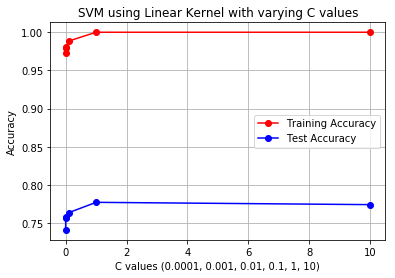

In [84]:
plt.plot(c_vals, train_acc_carray, 'ro-') 
plt.plot(c_vals, test_acc_carray,'bo-') 
plt.grid()
plt.title("SVM using Linear Kernel with varying C values")
plt.xlabel("C values (0.0001, 0.001, 0.01, 0.1, 1, 10)")
plt.ylabel("Accuracy")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='best')